In [1]:
import pandas as pd

# CSV ファイルを読み込む
df = pd.read_csv("Updated_Parking_Data.csv")

# 日時データを datetime 型に変換
df['date_time'] = pd.to_datetime(df['date_time'])

# One-Hot Encoding を適用
df = pd.get_dummies(df, columns=['weather', 'event'])

# Prophet のデータ形式に変換
df_prophet = df.rename(columns={'date_time': 'ds', 'usage': 'y'})

# Prophet モデルのインスタンスを作成
from prophet import Prophet
model = Prophet()

# One-Hot した変数をすべて Prophet に追加
for col in df_prophet.columns:
    if col not in ['ds', 'y']:  # 'ds'（日時）と 'y'（予測対象）は除外
        model.add_regressor(col)

# モデルの学習
model.fit(df_prophet)

print("モデルの学習が完了しました！")


c:\Users\higtr\anaconda3\envs\stan_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
17:06:19 - cmdstanpy - INFO - Chain [1] start processing
17:06:19 - cmdstanpy - INFO - Chain [1] done processing


モデルの学習が完了しました！


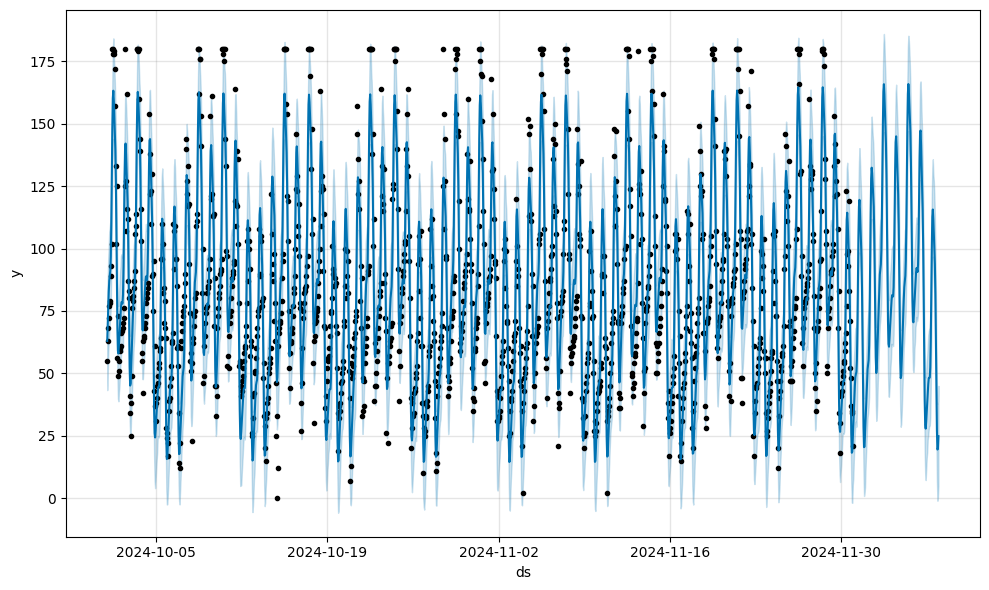

In [2]:
#★予測の実行
# 未来のデータを作成（7日間、1時間ごと）
future = model.make_future_dataframe(periods=7 * 24, freq='h')

# One-Hot Encoding した変数も未来データに追加（過去データの平均値を使用）
for col in df_prophet.columns:
    if col not in ['ds', 'y']:
        future[col] = df_prophet[col].mean()  # 過去データの平均値で補完

# 予測の実行
forecast = model.predict(future)

#★可視化
import matplotlib.pyplot as plt

# 予測結果を描画
fig = model.plot(forecast)
plt.show()


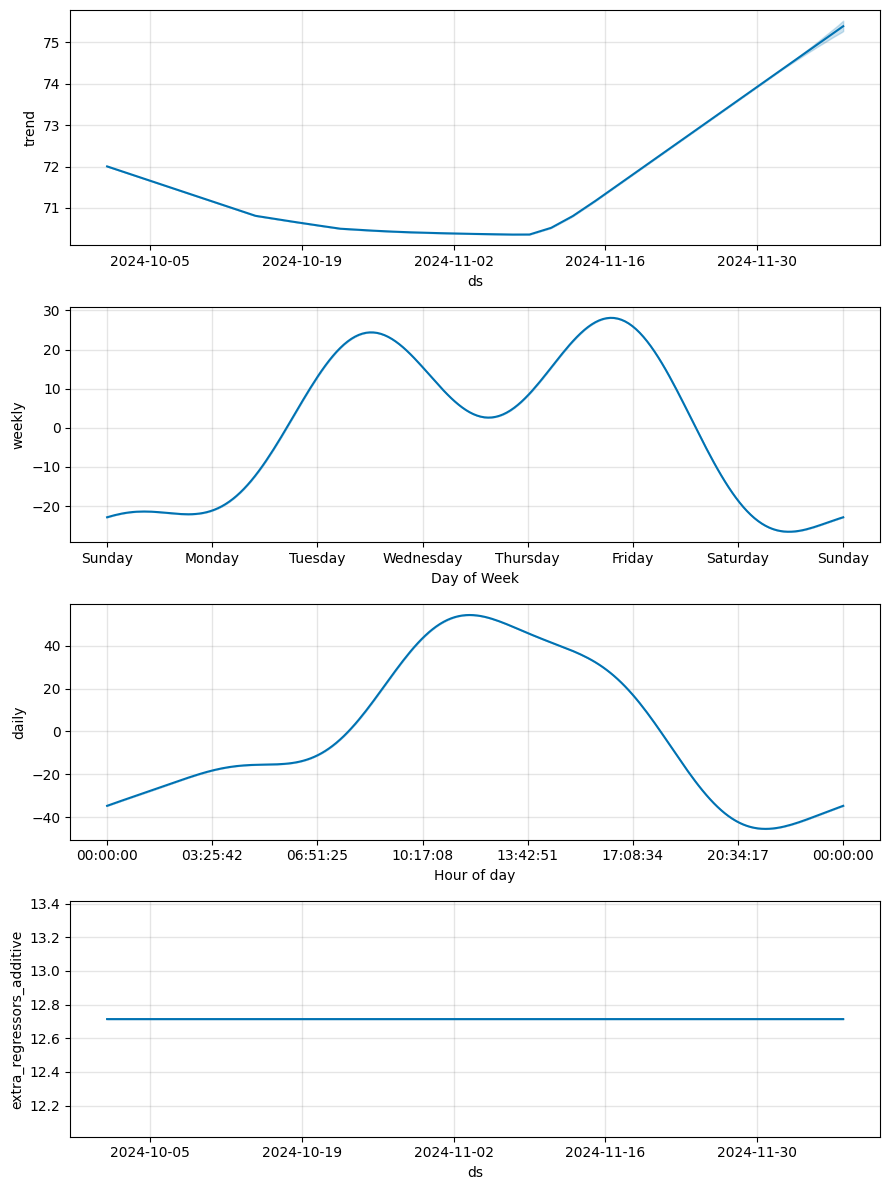

In [3]:
#外部変数の影響を確認
fig = model.plot_components(forecast)
plt.show()


In [4]:
import pickle

# モデルを保存
with open("prophet_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("モデルを保存しました！")

モデルを保存しました！


In [5]:
import matplotlib.pyplot as plt

# 雨の日の駐車台数の平均 vs 晴れの日の平均を比較
rainy_days = df_prophet[df_prophet['weather_雨'] == 1]['y'].mean()
sunny_days = df_prophet[df_prophet['weather_晴れ'] == 1]['y'].mean()

print(f"雨の日の平均駐車台数: {rainy_days}")
print(f"晴れの日の平均駐車台数: {sunny_days}")


雨の日の平均駐車台数: 87.83928571428571
晴れの日の平均駐車台数: 84.68608799048752
